In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train_data.csv')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
df.shape

(58592, 44)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
print("Total missing values :" , df.isnull().sum().sum())
print("Total duplicate values:" , df.duplicated().sum())
print("Rows with missing values:", df.isnull().any(axis = 1).sum())

Total missing values : 0
Total duplicate values: 0
Rows with missing values: 0


In [ ]:
df.nunique().sort_values()

cylinder                                2
transmission_type                       2
gear_box                                2
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_washer                   2
is_rear_window_defogger                 2
rear_brakes_type                        2
is_brake_assist                         2
is_central_locking                      2
is_power_steering                       2
is_driver_seat_height_adjustable        2
is_day_night_rear_view_mirror           2
is_ecw                                  2
is_speed_alert                          2
is_power_door_locks                     2
is_parking_camera                       2
is_claim                                2
is_tpms                                 2
is_adjustable_steering                  2
is_parking_sensors                      2
is_esc                                  2
airbags                                 3
steering_type                     

## Basic Data Cleaning

In [ ]:
df.drop(columns = 'policy_id' , inplace = True)

## Data Visualization

In [ ]:
categorical_cols = [col for col in df.columns if (df[col].dtype == "object") and
                    col not in ['is_claim']]

numerical_cols = [col for col in df.columns if (df[col].dtype in ['int64', 'float64']) and
                  col not in ['is_claim']]

print('Number of Numerical columns   :',len(numerical_cols))
print('Number of Categorical columns :',len(categorical_cols))

Number of Numerical columns   : 15
Number of Categorical columns : 27


In [ ]:
df[categorical_cols].nunique() > 5

area_cluster                         True
segment                              True
model                                True
fuel_type                           False
max_torque                           True
max_power                            True
engine_type                          True
is_esc                              False
is_adjustable_steering              False
is_tpms                             False
is_parking_sensors                  False
is_parking_camera                   False
rear_brakes_type                    False
transmission_type                   False
steering_type                       False
is_front_fog_lights                 False
is_rear_window_wiper                False
is_rear_window_washer               False
is_rear_window_defogger             False
is_brake_assist                     False
is_power_door_locks                 False
is_central_locking                  False
is_power_steering                   False
is_driver_seat_height_adjustable  

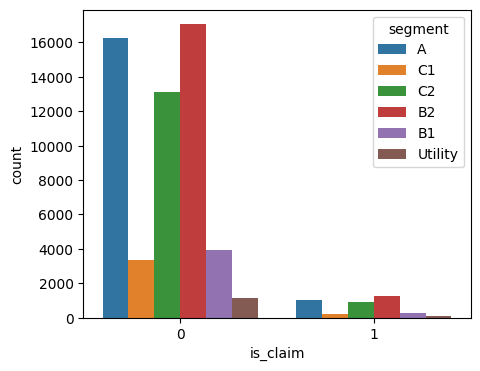

In [ ]:
plt.style.use('default')
plt.figure(figsize = (5,4))
sns.countplot(data  = df , x='is_claim', hue = 'segment')

In [ ]:
cols_to_plot = ['area_cluster', 'segment', 'model', 'max_torque', 'max_power', 'engine_type']

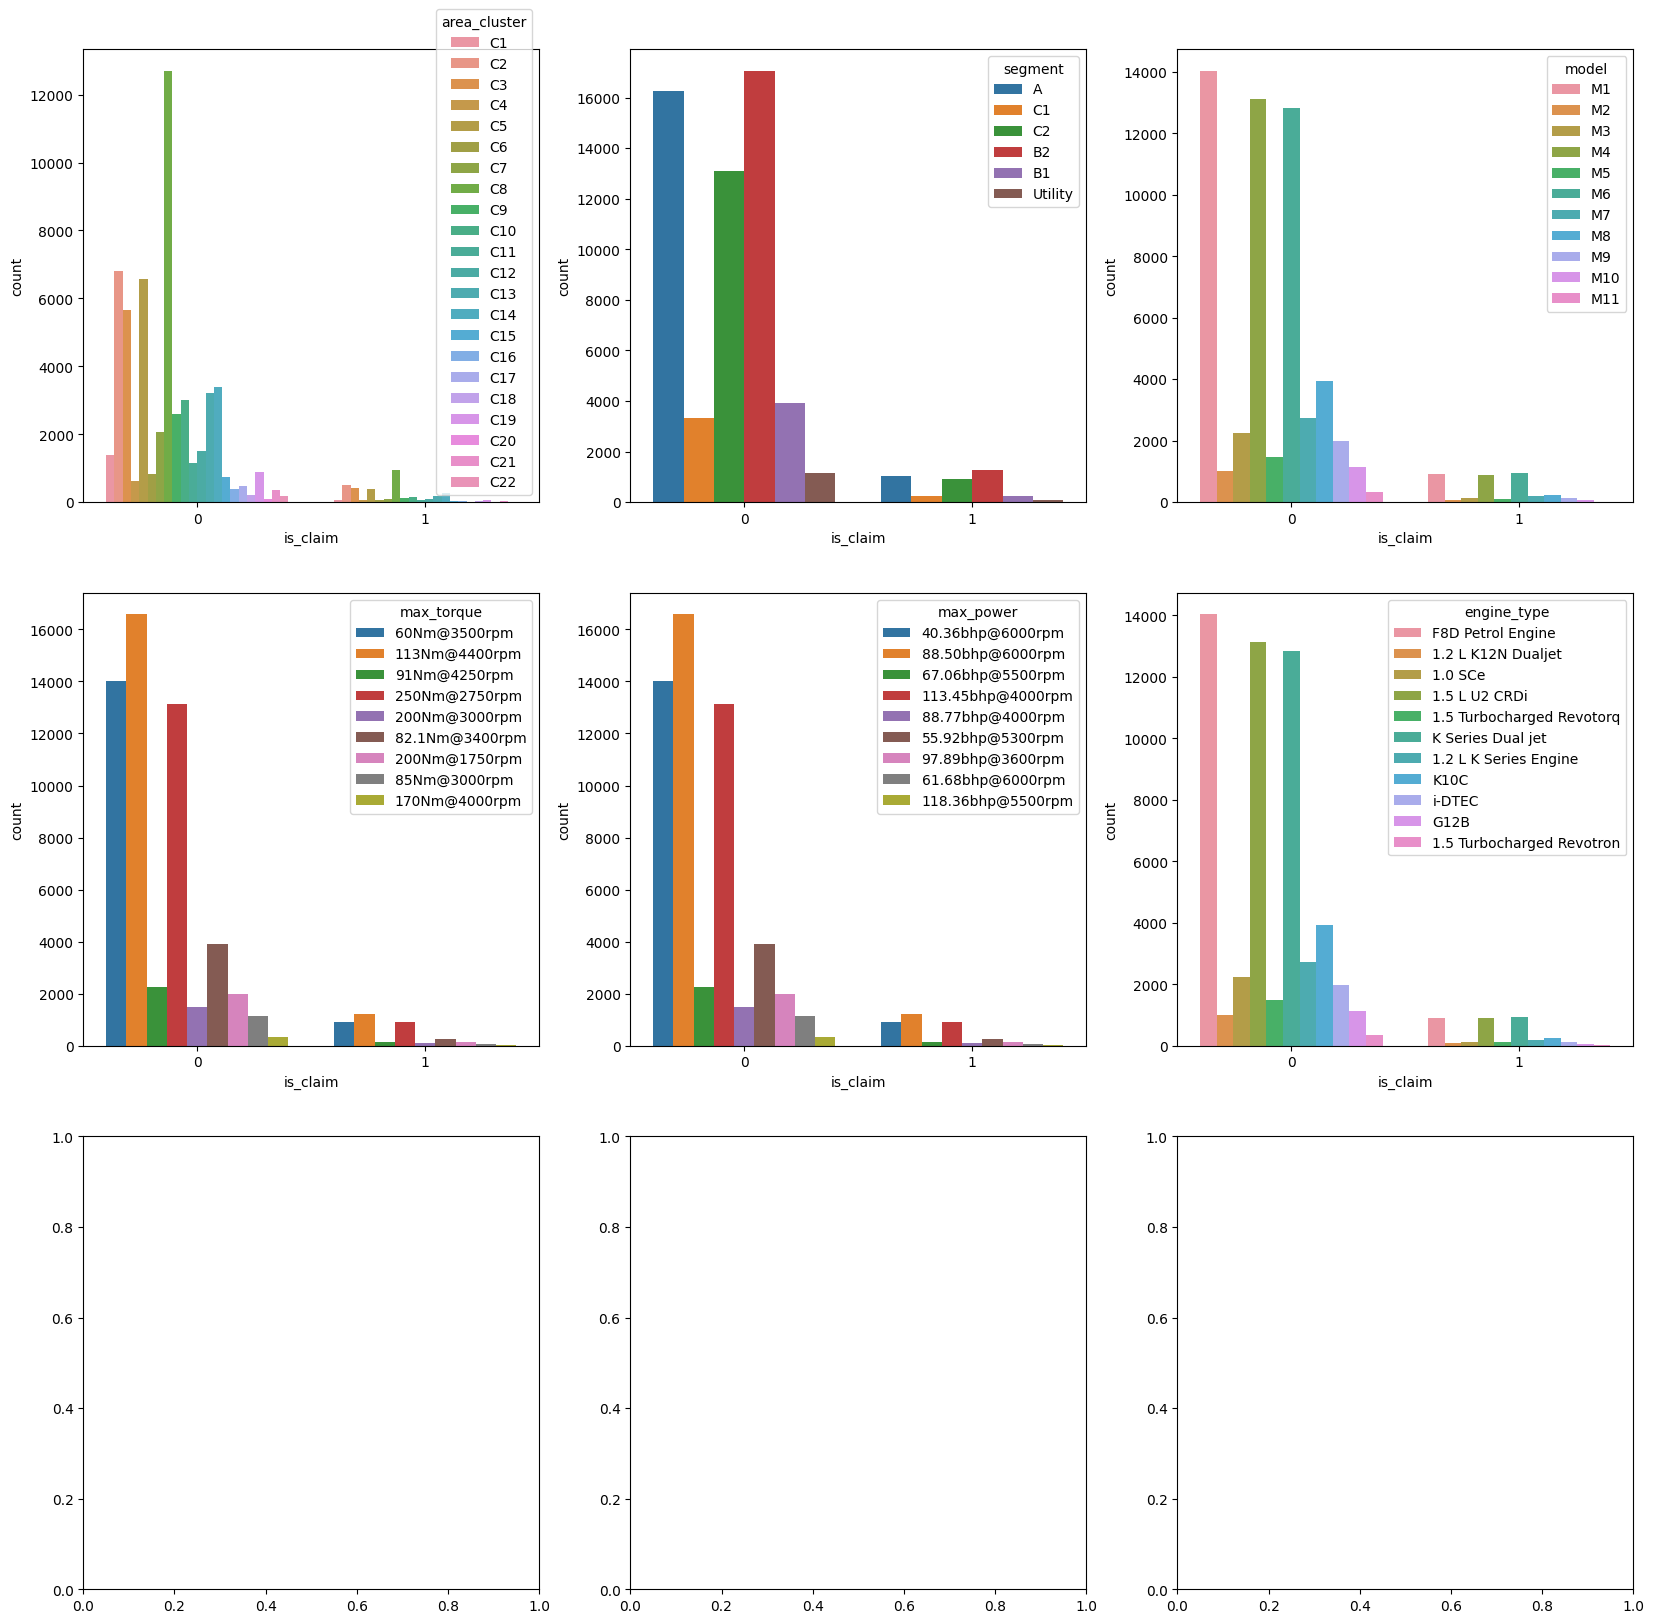

In [ ]:
def plot_countplot_by_claim_flag(df,cols):
    sns.set_theme(style="whitegrid")
    plt.style.use('default')

    n_rows, n_cols = (len(cols) // 3) + 1, 3
    figure, axis = plt.subplots(n_rows, n_cols, figsize = (20,20))
    
    i = 0
    for col in cols:
        j = i//n_cols
        k = i%n_cols
        sns.countplot(data  = df , x='is_claim', hue = col, ax=axis[j,k])
        i +=1

plot_countplot_by_claim_flag(df , cols_to_plot)

In [ ]:
df['engine_type'].nunique()

11

In [ ]:
cols_to_plot1 = [col for col in categorical_cols if df[col].nunique() == 2  and col not in cols_to_plot]  # binary cols

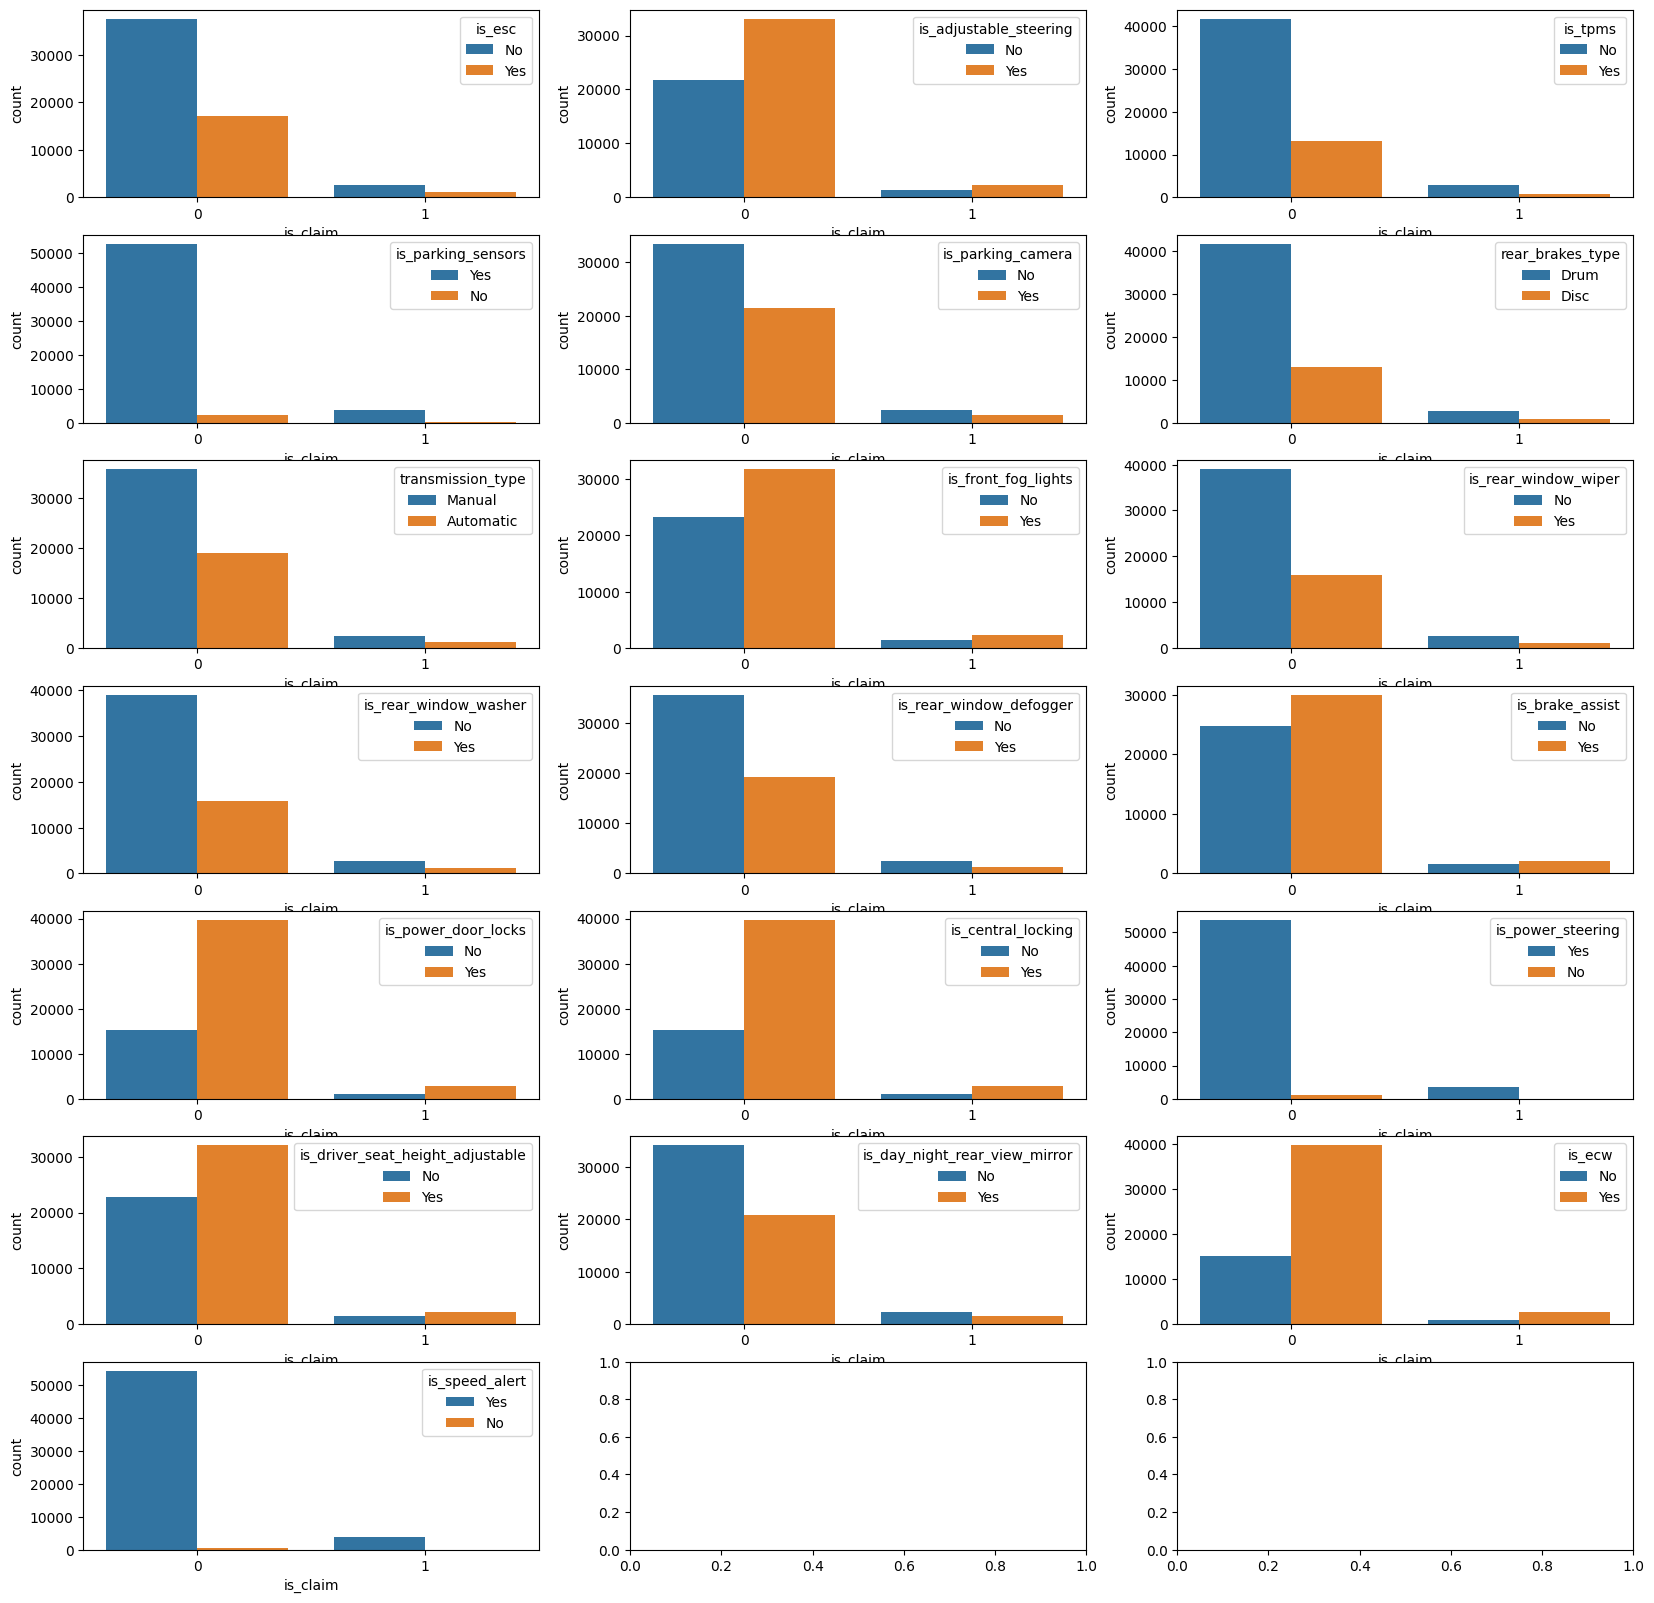

In [ ]:
plot_countplot_by_claim_flag(df , cols_to_plot1)

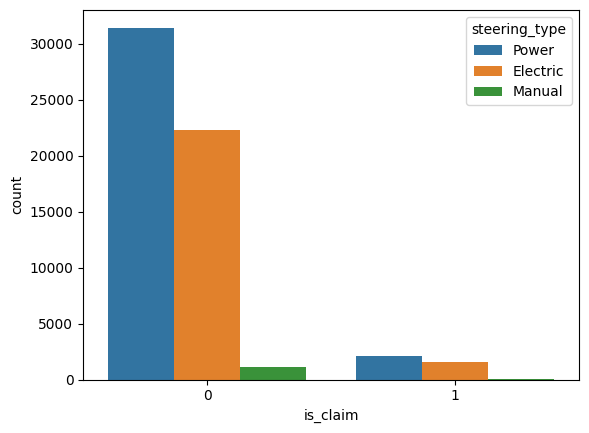

In [ ]:
sns.countplot(data  = df , x='is_claim', hue = 'steering_type')       # similar for 'fuel_type'

In [ ]:
def plot_boxplot_by_claim(df,cols):
    plt.style.use('default')

    n_rows, n_cols = (len(cols) // 3) + 1, 3
    figure, axis = plt.subplots(n_rows, n_cols, figsize = (20,20))
    
    i = 0
    for col in cols:
        j = i//n_cols
        k = i%n_cols
        sns.boxplot(data  = df , y=col, x='is_claim', ax=axis[j,k])
        i +=1

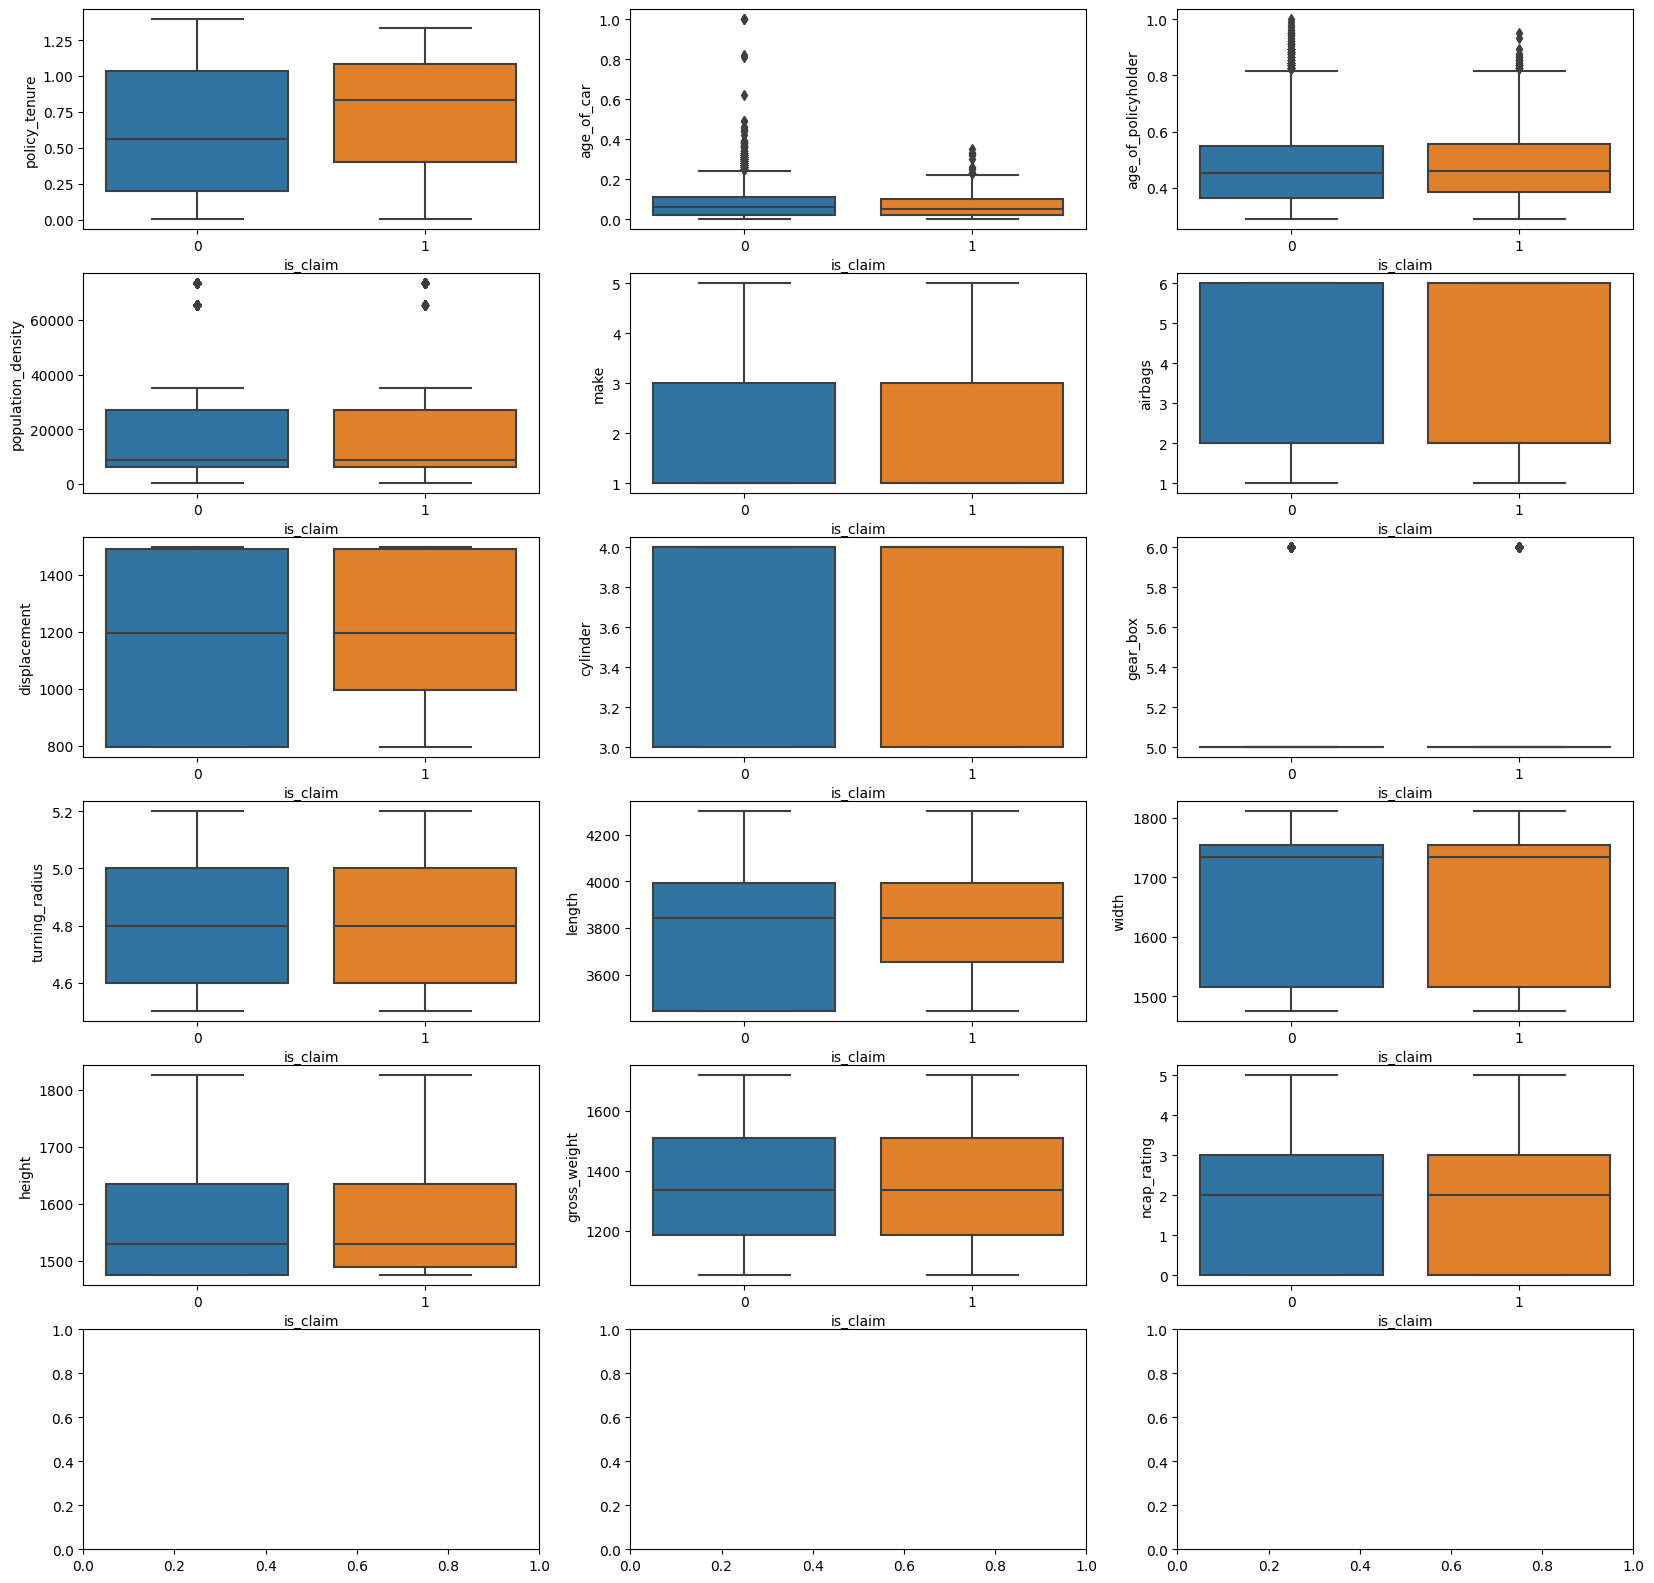

In [ ]:
plot_boxplot_by_claim(df , numerical_cols)

In [ ]:
for i in range(0,11):
    print(70+i,'percentile value is',np.percentile(df['gear_box'],70+i))

70 percentile value is 5.0
71 percentile value is 5.0
72 percentile value is 5.0
73 percentile value is 5.0
74 percentile value is 5.0
75 percentile value is 5.0
76 percentile value is 6.0
77 percentile value is 6.0
78 percentile value is 6.0
79 percentile value is 6.0
80 percentile value is 6.0


In [ ]:
df['make'].unique()      # One_hot

array([1, 2, 3, 4, 5])

In [ ]:
df['gear_box'].unique()  # Should be ordinal encoded

array([5, 6])

In [ ]:
df['airbags'].unique()   # ordinal

array([2, 6, 1])

In [ ]:
df['cylinder'].unique()   # ordinal

array([3, 4])

In [ ]:
df['ncap_rating'].unique() # ordinal

array([0, 2, 3, 5, 4])

In [ ]:
for i in range(0,10):
    print(90+ i ,'percentile value is',np.percentile(df['population_density'], 90+ i))

90 percentile value is 34738.0
91 percentile value is 34791.0
92 percentile value is 34791.0
93 percentile value is 34791.0
94 percentile value is 65567.0
95 percentile value is 73430.0
96 percentile value is 73430.0
97 percentile value is 73430.0
98 percentile value is 73430.0
99 percentile value is 73430.0


## Check Imbalance

[93.60322228290552, 6.396777717094484]


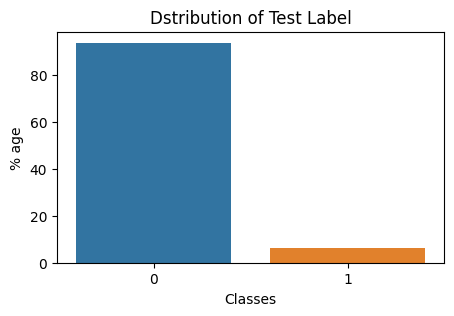

In [ ]:
vc = df['is_claim'].value_counts()
x_axis = [0,1]
y_axis = [(vc[0] / (vc[0] + vc[1] ))*100 , (vc[1] / (vc[0] + vc[1] ))*100]

print(y_axis)

plt.style.use("default")
plt.figure(figsize = (5,3))
plt.title("Dstribution of Test Label")
plt.xlabel("Classes")
plt.ylabel("% age")
sns.barplot(x = x_axis , y = y_axis)
plt.show()

# Encoding

### binary

In [ ]:
binary_features = [col for col in df.columns if (df[col].nunique() == 2) and
                    col not in ['is_claim']]

In [ ]:
len(binary_features)

21

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
bin_encoder = OrdinalEncoder()

In [ ]:
binary_features_encoded = pd.DataFrame(bin_encoder.fit_transform(df[binary_features]) , columns = binary_features)
binary_features_encoded.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,cylinder,transmission_type,gear_box,is_front_fog_lights,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
binary_features_encoded.shape

(58592, 21)

### Ordinal

In [ ]:
max_torque_ord = ['60Nm@3500rpm', '82.1Nm@3400rpm', '85Nm@3000rpm',
       '91Nm@4250rpm' , '113Nm@4400rpm', '170Nm@4000rpm', '200Nm@1750rpm', '200Nm@3000rpm',
       '250Nm@2750rpm']

In [ ]:
max_power_ord = ['40.36bhp@6000rpm','55.92bhp@5300rpm', '61.68bhp@6000rpm', '67.06bhp@5500rpm',
                '88.50bhp@6000rpm', '88.77bhp@4000rpm', '97.89bhp@3600rpm', '113.45bhp@4000rpm', '118.36bhp@5500rpm']

In [ ]:
len(max_power_ord)

9

In [ ]:
df['max_power'].nunique()

9

In [ ]:
airbags_ord = [1, 2, 6]
ncap_ord  = [0, 2, 3, 4, 5]

In [ ]:
torque_encoder =      OrdinalEncoder(categories= [ np.array(max_torque_ord) ])
power_encoder =       OrdinalEncoder(categories= [ np.array(max_power_ord) ] )
airbags_encoder =     OrdinalEncoder(categories= [ np.array(airbags_ord) ])
ncap_encoder =        OrdinalEncoder(categories= [ np.array(ncap_ord) ] )

In [ ]:
torque = pd.DataFrame(torque_encoder.fit_transform( df[['max_torque']] ), columns = ['max_torque'])
torque.head()

,max_torque
0,0.0
1,0.0
2,0.0
3,4.0
4,3.0


In [ ]:
power = pd.DataFrame(power_encoder.fit_transform( df[['max_power']] ), columns = ['max_power'])
power.head()

,max_power
0,0.0
1,0.0
2,0.0
3,4.0
4,3.0


In [ ]:
airbags = pd.DataFrame( airbags_encoder.fit_transform(df[['airbags']]) , columns = ['airbags'] )
airbags.head()

,airbags
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
ncap = pd.DataFrame( ncap_encoder.fit_transform(df[['ncap_rating']]) , columns = ['ncap_rating'] )
ncap.head()

,ncap_rating
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


### Numerical

In [ ]:
numerical_cols.remove('make')

In [ ]:
numerical_cols.remove('gear_box')

In [ ]:
numerical_cols.remove('airbags')

In [ ]:
numerical_cols.remove('cylinder')

In [ ]:
numerical_cols.remove('ncap_rating')

In [ ]:
len(numerical_cols)

10

In [ ]:
df[numerical_cols].nunique()

policy_tenure          58592
age_of_car                49
age_of_policyholder       75
population_density        22
displacement               9
turning_radius             9
length                     9
width                     10
height                    11
gross_weight              10
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_df = pd.DataFrame( ss.fit_transform(df[numerical_cols]) , columns = numerical_cols )

In [ ]:
numerical_df.shape

(58592, 10)

### One_hot

In [ ]:
ohe_features = [col for col in df.columns if (col not in binary_features) and (col not in numerical_cols)
                                              and (col not in ['max_torque', 'max_power', 'airbags', 'ncap_rating', 'is_claim'])]

In [ ]:
len(ohe_features)

7

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe_features_encoded = pd.DataFrame( ohe_encoder.fit_transform(df[ohe_features]) )

ohe_features_encoded.columns = ohe_encoder.get_feature_names_out()

In [ ]:
ohe_features_encoded.head()

,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,...,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,steering_type_Electric,steering_type_Manual,steering_type_Power
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
ohe_features_encoded.shape

(58592, 61)

### Combine Set

In [ ]:
training_set = pd.concat([numerical_df , binary_features_encoded, torque, power, airbags, ncap, ohe_features_encoded] , axis = 1)

In [ ]:
training_set.shape

(58592, 96)

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample( training_set, df['is_claim'])

In [ ]:
vc1 = y.value_counts()
x_axis = [0,1]
y_axis = [(vc1[0] / (vc1[0] + vc1[1] ))*100 , (vc1[1] / (vc1[0] + vc1[1] ))*100]

print(y_axis)


[50.0, 50.0]


## Colineararity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [vif(df.values, i) for i in range(len(df.columns))]

    return vif_data

In [ ]:
vif_training_data = calculate_vif(X.iloc[:10000 , :])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif_training_data.feature[vif_training_data["VIF"] > 5]

3         population_density
4               displacement
5             turning_radius
6                     length
7                      width
               ...          
91          engine_type_K10C
92        engine_type_i-DTEC
93    steering_type_Electric
94      steering_type_Manual
95       steering_type_Power
Name: feature, Length: 93, dtype: object

### Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = X.shape[1])
pca_data = pca.fit_transform(X)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

In [ ]:
cumm_var_explained[:35]

array([0.69522482, 0.77549903, 0.80898957, 0.83884066, 0.86650037,
       0.89324311, 0.91430936, 0.93271607, 0.94659235, 0.95675365,
       0.96568406, 0.97304717, 0.97783921, 0.98146502, 0.98482222,
       0.98740612, 0.98972024, 0.99193664, 0.99357565, 0.99478714,
       0.99576565, 0.99651108, 0.9971713 , 0.99771021, 0.99818587,
       0.99856936, 0.99888405, 0.99918147, 0.99940095, 0.99957724,
       0.9997356 , 0.99987679, 0.99996524, 1.        , 1.        ])

In [ ]:
pca = PCA(n_components= 34)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(109688, 34)

## RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm  import SVR

estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select = 82, step=1)

In [ ]:
X.shape

(109688, 96)

In [ ]:
X_sample = X[:10000]
y_sample = y[:10000]

In [ ]:
X_sample.shape, y_sample.shape

((10000, 96), (10000,))

In [ ]:
X_rfe = selector.fit(X_sample, y_sample)

In [ ]:
X_rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True])

In [ ]:
feature_idx = []
for val in range(len(X_rfe.support_)):
    if X_rfe.support_[val] == True:
        feature_idx.append(val)

In [ ]:
len(feature_idx)

82

### Modelling

In [ ]:
x_train_rfe = X.iloc[: , feature_idx]
y_train_rfe = y[:]

In [ ]:
x_train_rfe.shape , y_train_rfe.shape

((109688, 82), (109688,))

In [ ]:
# Splitting the data into cv and train set
from sklearn.model_selection import train_test_split 
x_train , x_cv , y_train, y_cv = train_test_split(x_train_rfe , y_train_rfe , test_size = 0.2 , random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE

from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

classifiers = [
    ('Logistic', SGDClassifier(loss = 'log')),
    ('Random Forest', RandomForestClassifier(random_state=0, max_depth=5, n_estimators=10, max_features=1)),
    ('XGBoost', XGBClassifier(random_state=0)),
    ('AdaBoost', AdaBoostClassifier(random_state=0)),
    ('Neural_nets' , MLPClassifier())
]

In [ ]:
performance = []
for name, clf in classifiers:
    clf.fit(x_train.iloc[:10000, :], y_train[:10000])
    y_pred = clf.predict(x_cv)
    perf_tuple = (name, f1_score(y_cv, y_pred, average='weighted'))
    #print(perf_tuple)
    performance.append(perf_tuple)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
performance

[('Logistic', 0.5306830057047648),
 ('Random Forest', 0.6142272394314026),
 ('XGBoost', 0.826319929638618),
 ('AdaBoost', 0.686513453447538),
 ('Neural_nets', 0.6493092147769667)]

In [ ]:
%pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

clf1 = RandomForestClassifier(random_state=0, max_depth=5, n_estimators=10, max_features=1)
clf2 = XGBClassifier(random_state=0)
clf3 = SVC(kernel = 'linear')
clf4 = GaussianNB()
clf5 = MLPClassifier()
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr)

sclf.fit(x_train.iloc[:30000 , :] , y_train[:30000])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


StackingClassifier(classifiers=[RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10,
                                                       random_state=0),
                                XGBClassifier(), SVC(kernel='linear'),
                                GaussianNB(), MLPClassifier()],
                   meta_classifier=LogisticRegression())

In [ ]:
y_pred_train = sclf.predict(x_train.iloc[:10000 , :])
f1_score(y_train[:10000], y_pred_train , average='weighted')

In [ ]:
y_pred = sclf.predict(x_cv)
f1_score(y_cv, y_pred, average='weighted')

0.8090453477987117

In [ ]:
xgb = XGBClassifier(random_state=0)

In [ ]:
x_train.shape

(87750, 75)

In [ ]:
xgb.fit(x_train.iloc[:50000, :] , y_train[:50000])

XGBClassifier()

In [ ]:
y_pred_train = xgb.predict(x_train)
f1_score(y_train, y_pred_train , average='weighted')

0.8155200469409835

In [ ]:
y_pred = xgb.predict(x_cv)

In [ ]:
f1_score(y_cv, y_pred, average='weighted')

0.8178505218926594

# Test Data

In [ ]:
test_set = pd.read_csv('test_data.csv')
test_set.shape

(39063, 43)

In [ ]:
df_test = test_set.drop(columns = ['policy_id'])

In [ ]:
bin_fea_test = pd.DataFrame(bin_encoder.transform(df_test[binary_features]) , columns = binary_features)
bin_fea_test.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,cylinder,transmission_type,gear_box,is_front_fog_lights,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
torque_test = pd.DataFrame(torque_encoder.transform( df_test[['max_torque']] ), columns = ['max_torque'])
torque_test.head()

,max_torque
0,0.0
1,4.0
2,3.0
3,0.0
4,0.0


In [ ]:
power_test = pd.DataFrame(power_encoder.transform( df_test[['max_power']] ), columns = ['max_power'])
power_test.head()

,max_power
0,0.0
1,4.0
2,3.0
3,0.0
4,0.0


In [ ]:
airbags_test = pd.DataFrame( airbags_encoder.transform(df_test[['airbags']]) , columns = ['airbags'] )
airbags_test.head()

,airbags
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
ncap_test = pd.DataFrame( ncap_encoder.transform(df_test[['ncap_rating']]) , columns = ['ncap_rating'] )
ncap_test.head()

,ncap_rating
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [ ]:
numerical_test = pd.DataFrame( ss.transform(df_test[numerical_cols]) , columns = numerical_cols )
numerical_test.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,displacement,turning_radius,length,width,height,gross_weight
0,-0.650761,-1.223968,0.953075,-0.835268,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828
1,-0.734040,1.067986,-0.220632,-0.568111,0.130093,-0.231926,-0.017585,0.559973,-0.293078,-0.236684
2,-0.684101,0.891682,-0.142385,-0.568111,-0.613422,0.645040,-0.383610,-0.831789,-0.795455,-1.084057
3,0.413877,-1.047663,-0.064138,0.900969,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828
4,1.502242,-0.871359,1.344310,0.900969,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828


In [ ]:
ohe_fea_test = pd.DataFrame( ohe_encoder.transform(df_test[ohe_features]) )

ohe_fea_test.columns = ohe_encoder.get_feature_names_out()

ohe_fea_test.head()

,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,...,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_test_encoded = pd.concat([numerical_test , bin_fea_test, torque_test, power_test, airbags_test, 
                          ncap_test, ohe_fea_test] , axis = 1)

In [ ]:
df_test_encoded.shape

(39063, 96)

In [ ]:
final_test_set = df_test_encoded.iloc[: , feature_idx]

In [ ]:
final_test_set.shape

(39063, 75)

In [ ]:
y_pred_test = sclf.predict(final_test_set)

In [ ]:
submission_file = test_set[['policy_id']]

In [ ]:
submission_file['is_claim'] = y_pred_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submission_file.head()

,policy_id,is_claim
0,ID58593,1
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0


In [ ]:
submission_file.shape

(39063, 2)

In [ ]:
submission_file.to_csv('third_submission.csv', index = False)